# The Spark Foundation - Data Science and Business Analytics Internship.                                       


# Grip @ The Spark Foundation By Muhammad Tabish


# Task 2: Prediction using UnSupervised ML


# Problem Statement: Predict the optimum number of clusters and represent it visually.

In [1]:
# Import required libraies

In [2]:
import warnings
warnings.filterwarnings("ignore")
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
#Read the data
data = pd.read_csv('C:\\Users\Muhammad Tabish\\Desktop\\tab\\Iris.csv')
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
data.shape

(150, 6)

In [5]:
data.info()
                

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
#dropping id column
data.drop('Id', axis=1, inplace=True)
data.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [7]:
print(data.isnull().sum), '\n\nNumber of Duplicate rows:  ', data.duplicated().sum() #checking duplicate rows

<bound method NDFrame._add_numeric_operations.<locals>.sum of      SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
0            False         False          False         False    False
1            False         False          False         False    False
2            False         False          False         False    False
3            False         False          False         False    False
4            False         False          False         False    False
..             ...           ...            ...           ...      ...
145          False         False          False         False    False
146          False         False          False         False    False
147          False         False          False         False    False
148          False         False          False         False    False
149          False         False          False         False    False

[150 rows x 5 columns]>


(None, '\n\nNumber of Duplicate rows:  ', 3)

In [8]:
#dropping duplicate rows
data.drop_duplicates(inplace=True)
data.shape[0] # gives number of rows. similarly, data.shape[1]
## now number of rows left 147, earlier there were 150 rows

147

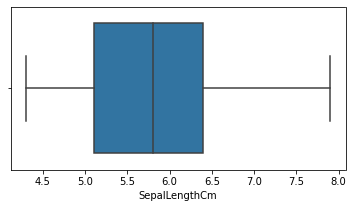

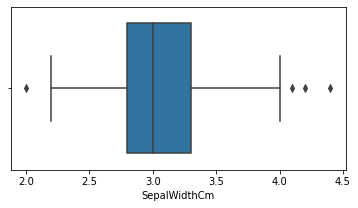

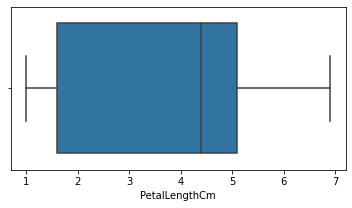

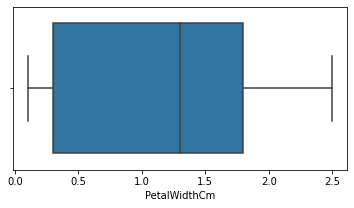

In [9]:
# check for any outliers in the numeric data

for i in data.columns:
    if data [i].dtype=='float64':
        plt.figure(figsize=(6,3))
        sns.boxplot(data[i])
        plt.show()
    

In [10]:
### Treating outliers present in the SepalWidthCm column

q1,q3 = np.percentile(data['SepalWidthCm'],[25,75])
iqr = q3-q1
lower_fence = q1 - (1.5*iqr)
upper_fence = q3 + (1.5*iqr)
data['SepalWidthCm'] = data['SepalWidthCm'].apply(lambda x: upper_fence if x>upper_fence 
                                                  else lower_fence if x<lower_fence else x)
        

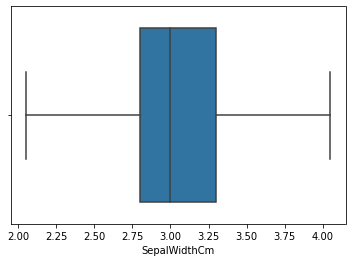

In [11]:
sns.boxplot(data['SepalWidthCm']);

# Understanding the data
#target class



Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: Species, dtype: int64


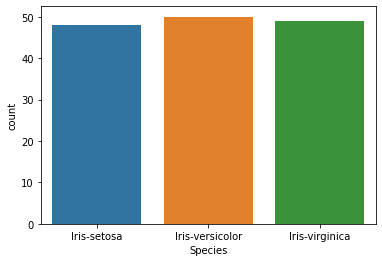

In [12]:
print(data.Species.value_counts())
sns.countplot(data.Species);

In [13]:
data.describe()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.052381,3.780272,1.208844
std,0.829100,0.426331,1.759111,0.757874
min,4.300000,2.050000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.050000,6.900000,2.500000


In [14]:
data.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

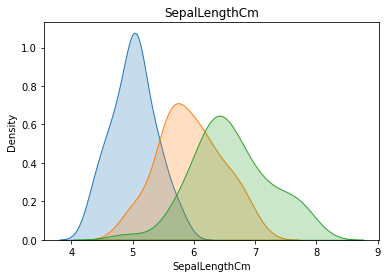

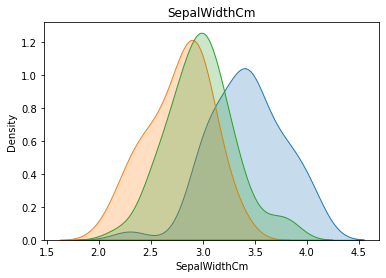

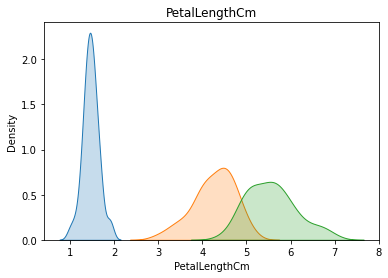

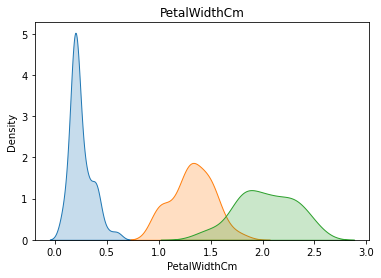

In [15]:
#Distributions of features by species

for i in data.columns[:-1]:
    
    sns.kdeplot(data = data.loc[data.Species=='Iris-setosa'][i], label="Iris-setosa", shade=True)
    
    sns.kdeplot(data = data.loc[data.Species=='Iris-versicolor'][i], label="Iris-versicolor", shade=True)

    sns.kdeplot(data = data.loc[data.Species=='Iris-virginica'][i], label="Iris-virginica", shade=True)

    plt.title(i);
    
    plt.show()

In [16]:
## Inference: We can not distinguish between the species based on Sepal Length/Width 
              # but we can clearly tell setosa apart from the other species based on Petal Length/Width

In [17]:
#Correlation Matrix

data.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.110155,0.871305,0.817058
SepalWidthCm,-0.110155,1.000000,-0.420140,-0.355139
PetalLengthCm,0.871305,-0.420140,1.000000,0.961883
PetalWidthCm,0.817058,-0.355139,0.961883,1.000000


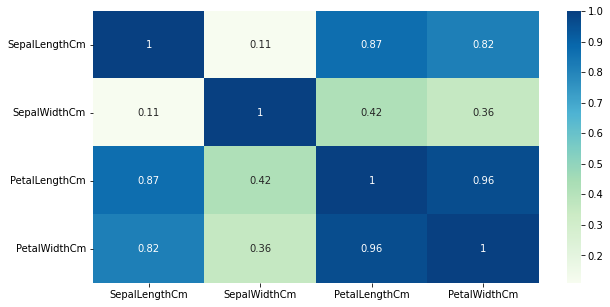

In [18]:
plt.figure(figsize=(10,5))
sns.heatmap(abs(data.corr()), cmap='GnBu', annot=True);

# K meas Clustering

In [19]:
from sklearn.cluster import KMeans

In [20]:
SSE = []
for i in range(1,10):
    kmeans = KMeans(  n_clusters = i, init='k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(data.iloc[:,[0,1,2,3]])
    SSE.append(kmeans.inertia_)

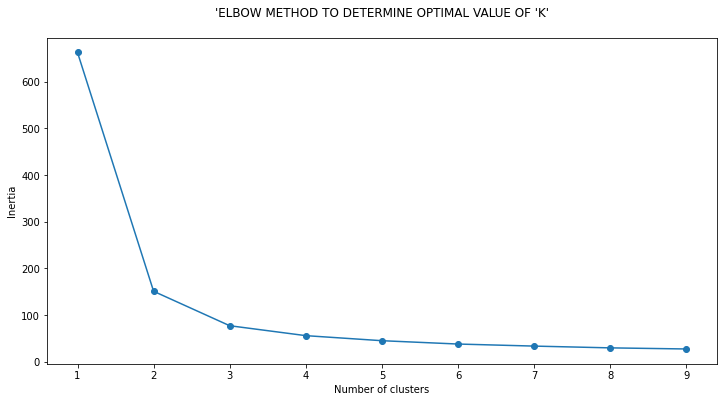

In [21]:
df = pd.DataFrame({'Cluster':range(1,10), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(df['Cluster'], df['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia');
plt.title("'ELBOW METHOD TO DETERMINE OPTIMAL VALUE OF 'K'\n");

In [22]:
kmeans =KMeans( n_clusters= 3, init='k-means++')
kmeans.fit(data.iloc[:,[0,1,2,3]])
kmeans.cluster_centers_

array([[5.01041667, 3.41979167, 1.4625    , 0.25      ],
       [5.90327869, 2.75      , 4.38196721, 1.42622951],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [23]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1])

In [24]:
data['cluster'] = kmeans.labels_

data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,cluster
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2
146,6.3,2.5,5.0,1.9,Iris-virginica,1
147,6.5,3.0,5.2,2.0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2


In [27]:
display(data['cluster'].value_counts(), data['Species'].value_counts())

1    61
0    48
2    38
Name: cluster, dtype: int64

Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: Species, dtype: int64

# Visualising the clusters

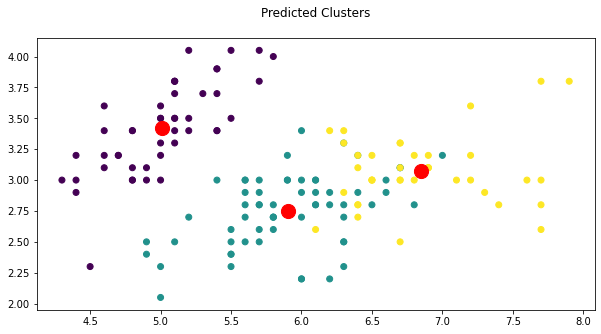

In [25]:
plt.figure(figsize=(10,5))
plt.scatter(data['SepalLengthCm'], data['SepalWidthCm'], c=data.cluster)
plt.title('Predicted Clusters\n')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1] ,  s=200, c='red', label = 'Centroids')
plt.show()